In [1]:
# find when two circles under downward gravity intersect



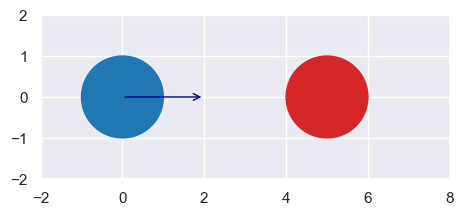

In [1]:
from perfect_physics import Circle, plot

a = Circle(x=0, y=0, r=1, vx=2, vy=0)
b = Circle(x=5, y=0, r=1, vx=0, vy=0)
w_acc_x = 0
w_acc_y = -9.8

plot(
    [a, b],
    colors=["tab:blue", "tab:red"],
    xlim=[-2, 8],
    ylim=[-2, 2],
    font_scale=1,
)
pass

In [2]:
from sympy import symbols, Eq

# define symbols
t, acc_x, acc_y = symbols("t, acc_x, acc_y")
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols("a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y")
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols("b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y")

# define equations
eq1 = Eq(aprime_x, a_x + a_vx * t + 0.5 * acc_x * t ** 2)
eq2 = Eq(aprime_y, a_y + a_vy * t + 0.5 * acc_y * t ** 2)
eq3 = Eq(bprime_x, b_x + b_vx * t + 0.5 * acc_x * t ** 2)
eq4 = Eq(bprime_y, b_y + b_vy * t + 0.5 * acc_y * t ** 2)
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2,
         (a_r + b_r)**2)

eq1

Eq(a'_x, a_vx*t + a_x + 0.5*acc_x*t**2)

In [3]:
from sympy import nonlinsolve
from perfect_physics import save

cc_acc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_acc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_acc_all_solutions]
save(cc_acc_time_solutions, "cc_acc_time_solutions.sympy")
cc_acc_time_solutions[0]

ZeroDivisionError: zero denominator